# Ejercicios Sesión 2
## Cómputo Evolutivo
### Phabel Antonio López Delgado

Enlace: https://colab.research.google.com/drive/1IxDRD6H3uzmxEkaX72JNNakvCOIoQQRc#scrollTo=-Z3rTJ2m2tAH

#### Quiz Tema 2

c)

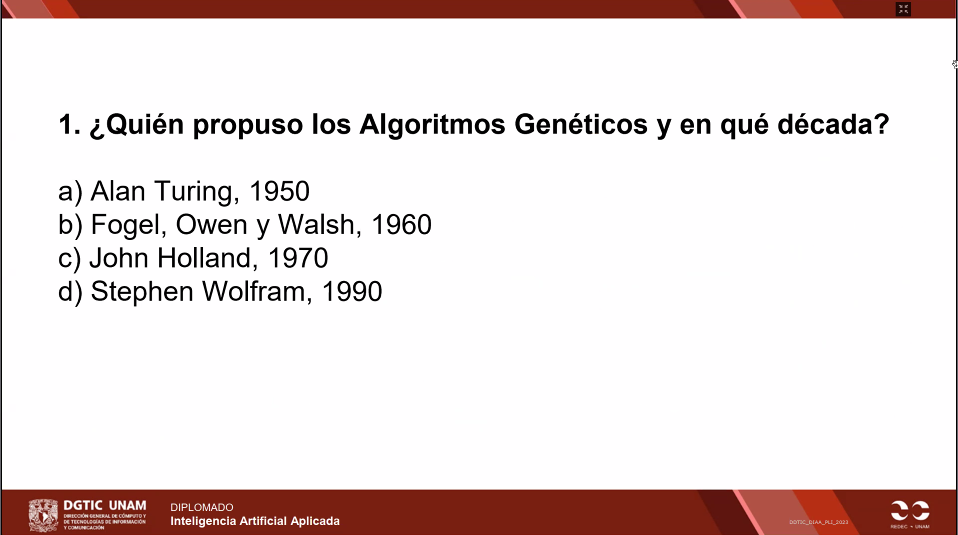

d)

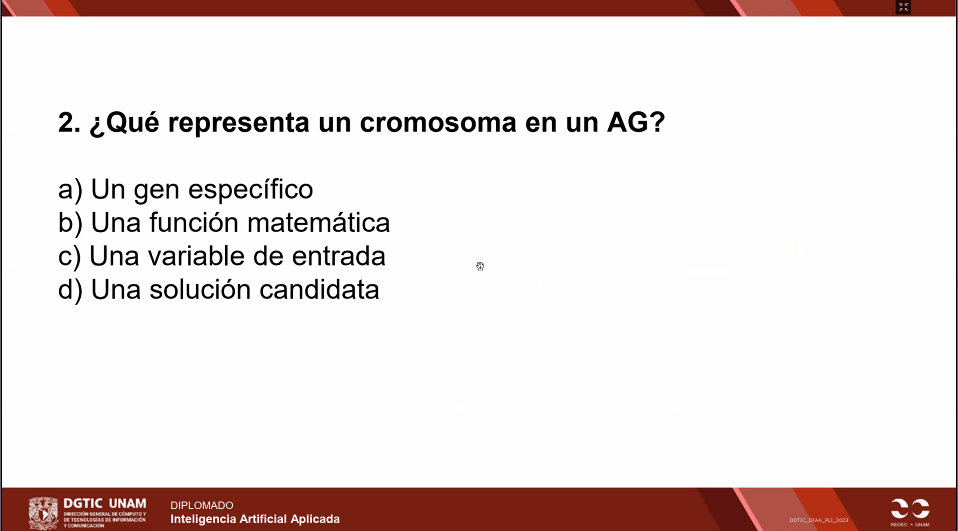



b)

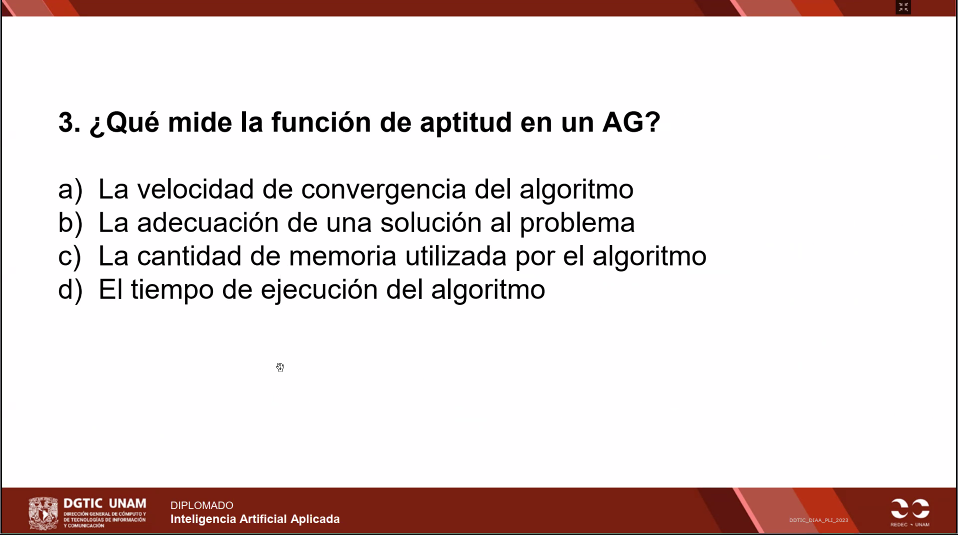

b)

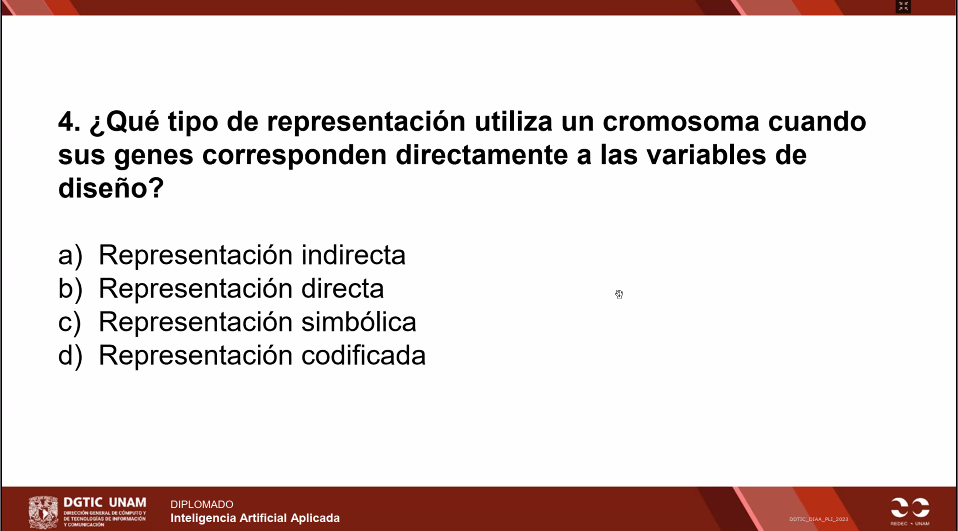

c)

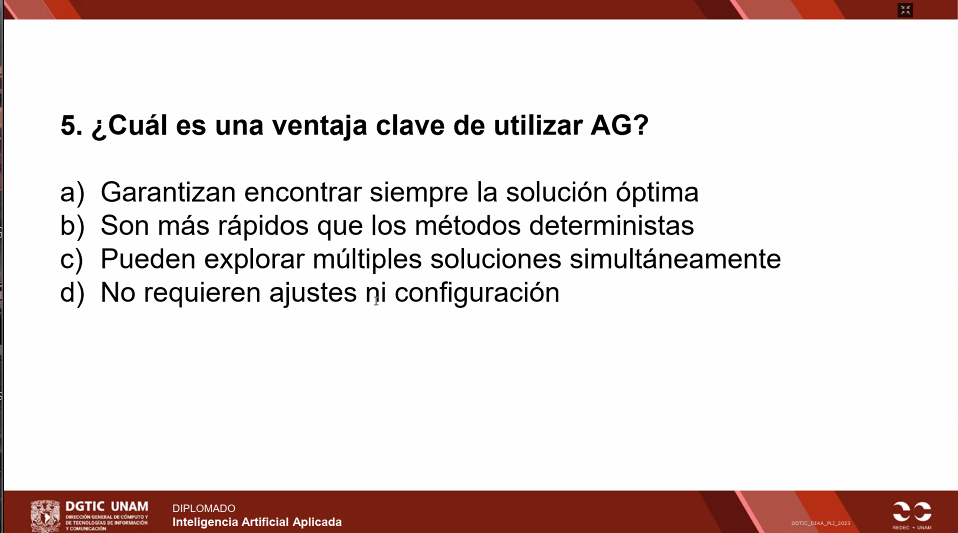

c)

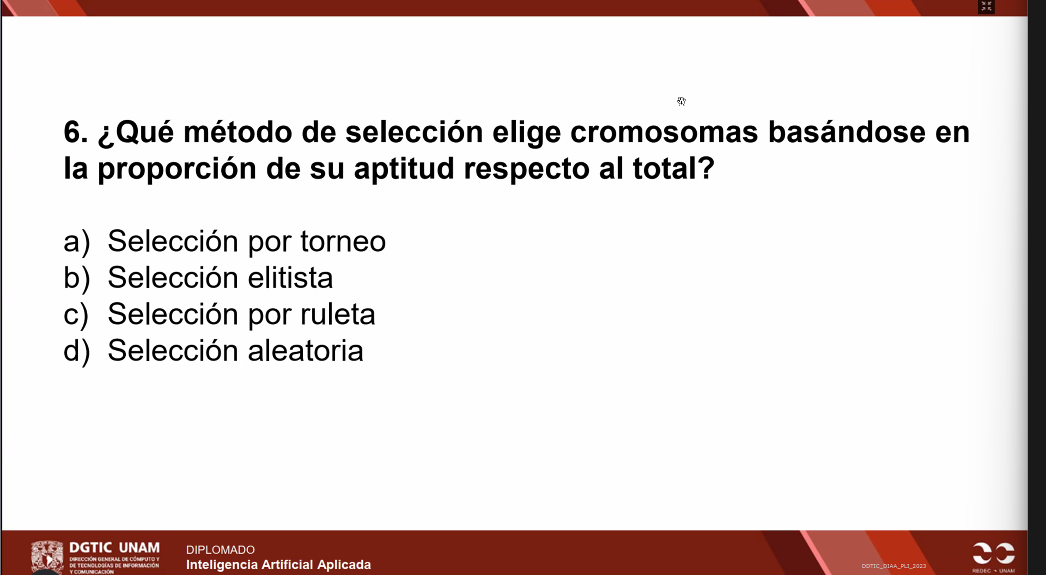

a)
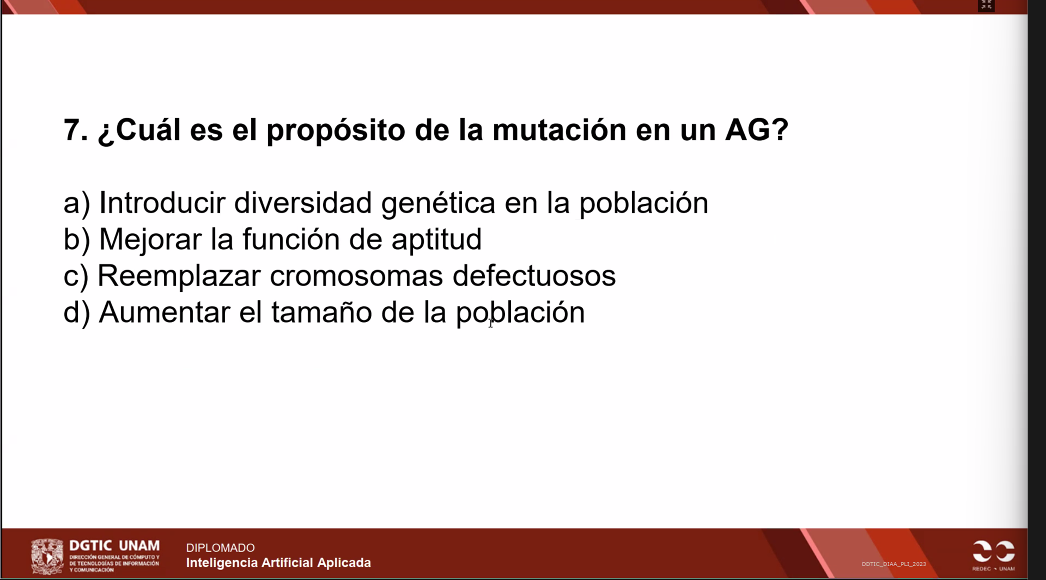


d)

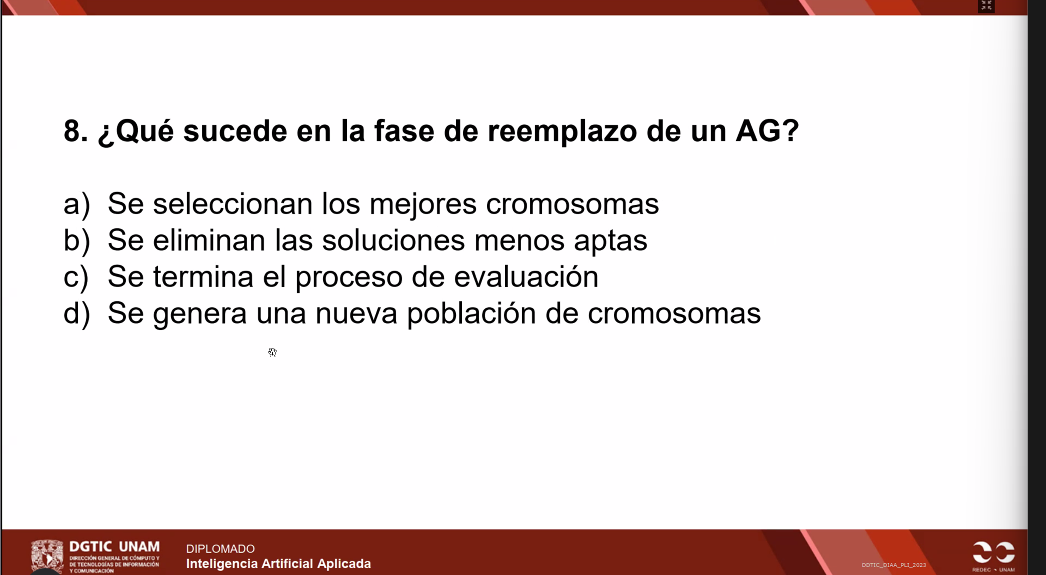

a)

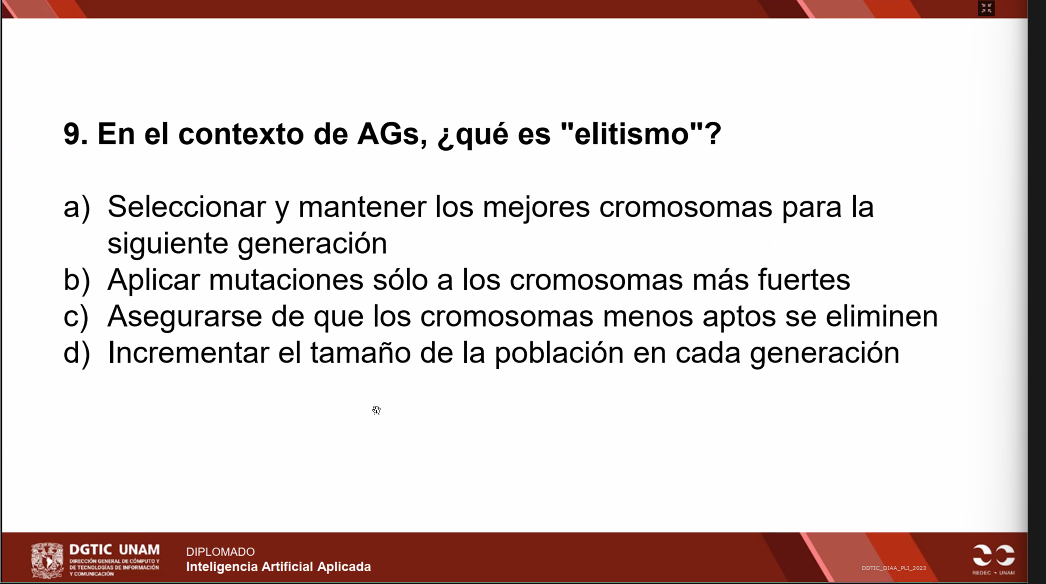

d)

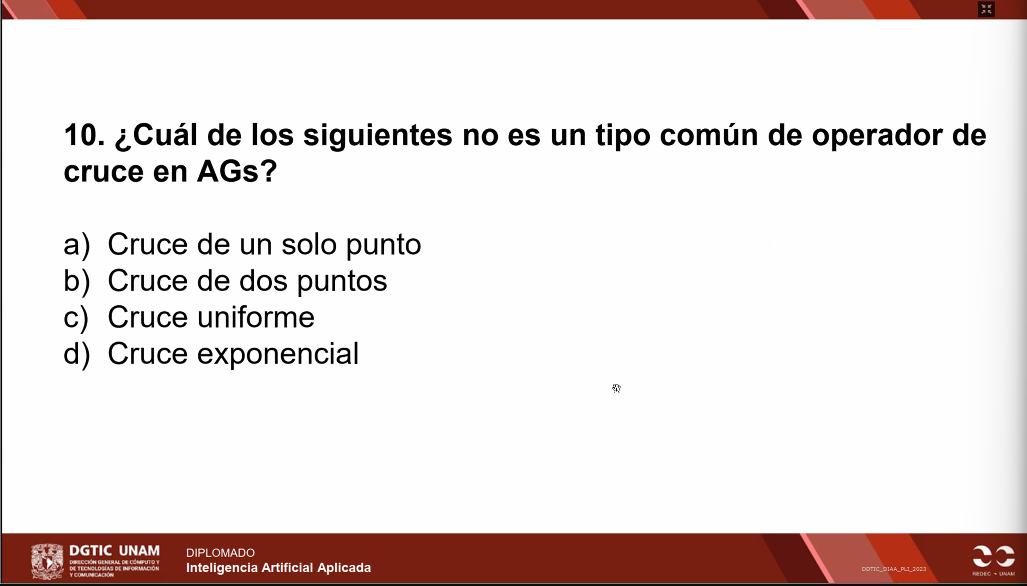



#### Caso de estudio 1: optimizar dimensiones de una caja. (Conversiones de cromosomas binarios, evaluación de la función de aptitud, cálculo de probabilidades de selección, cruce de un punto de los dos individuos con mayor probabilidad y ejemplos de mutaciones)

In [ ]:
# Funcion para obtener valores decimales de un cromosoma binario
import re

def bin2dec(cromosoma : str) -> list:
    # Definir patron de indices
    patron_indices = r'(.{3})(.{3})(.*)'
    # Separar cromosoma y convertir en int
    cromosoma = [int(x, 2) for x in re.split(patron_indices, cromosoma)[1:-1]]
    # Regresar lista con valores decimales
    return cromosoma


In [ ]:
# Funcion para convertir valores decimales en valores de dimensiones reales
def valor_real(cromosoma : list, lower :int = 0, upper : int = 5) -> list:
    # Regresar lista con valores reales segun funcion decodificadora
    return [lower + (x / (2**len(cromosoma) - 1)) * (upper - lower) for x in cromosoma]


In [ ]:
# Funcion de aptitud -> Volumen a maximizar
def aptitud(cromosoma : list) -> int:
    # Volumen de la caja
    volumen = cromosoma[0] * cromosoma[1] * cromosoma[2]
    # Area de la caja
    area = 2 * (cromosoma[0] * cromosoma[1] + cromosoma[0] * cromosoma[2] + cromosoma[1] * cromosoma[2])
    # Restriccion
    if area > 20:
        return 0
    # Regresar funcion de aptitud
    return volumen

In [ ]:
# Funcion para seleccion -> Metodo de la ruleta
import random

def seleccion_ruleta(cromosomas_binario : list, cromosomas_aptitud : list) -> list:
    # Calcular probabilidades de seleccion
    probabilidades_seleccion = [x / sum(cromosomas_aptitud) for x in cromosomas_aptitud]
    # Seleccionar al menos dos cromosomas
    while True:
        # Seleccionar por metodo de ruleta con boostrapping
        cromosomas_seleccionados = list(set(random.choices(cromosomas_binario, weights = probabilidades_seleccion, k = len(cromosomas_binario))))
        # Asegurarse de tener al menos dos cromosomas seleccionados
        if len(cromosomas_seleccionados) >= 2:
            break
    # Regresar cromosomas seleccionados
    return cromosomas_seleccionados

In [ ]:
# Funciones para cruce y mutacion
def cruce_1_punto(cromosoma_1 : str, cromosoma_2 : str) -> list:
    # Seleccionar punto de cruce
    punto_cruce = random.randint(1, len(cromosoma_1) - 1)
    # Realizar cruce
    nuevo_cromosoma_1 = cromosoma_1[:punto_cruce] + cromosoma_2[punto_cruce:]
    nuevo_cromosoma_2 = cromosoma_2[:punto_cruce] + cromosoma_1[punto_cruce:]
    # Regresar cromosomas hijos
    return [nuevo_cromosoma_1, nuevo_cromosoma_2]

def mutacion_1_bit(cromosoma : str) -> str:
    # Seleccionar bit a mutar
    bit_mutar = random.randint(len(cromosoma))
    # Realizar mutacion
    cromosoma = cromosoma & ~(1 << bit_mutar)
    return cromosoma

In [ ]:
# Funcion de reemplazo
def reemplazo(cromosomas_seleccionados : list, cromosomas_binario : list) -> list:
    # Asignar parametros y contadores
    n = len(cromosomas_binario)
    poblacion = len(cromosomas_seleccionados)
    nueva_poblacion = cromosomas_seleccionados.copy()
    # Mantener poblacion constante
    while poblacion < n:
        # Seleccionar cromosomas
        cromosoma_1 = random.choice(cromosomas_seleccionados)
        cromosoma_2 = random.choice(cromosomas_seleccionados)
        # No repetir padres
        while cromosoma_1 == cromosoma_2:
            cromosoma_2 = random.choice(cromosomas_seleccionados)
        # Realizar cruce
        nuevos_cromosomas = cruce_1_punto(cromosoma_1, cromosoma_2)
        # Agregar nuevos cromosomas
        if nuevos_cromosomas not in nueva_poblacion:
            nueva_poblacion.extend(nuevos_cromosomas)
        # Incrementar poblacion
        poblacion += 2
    # Regresar nueva poblacion
    return nueva_poblacion


In [ ]:
# Funcion del Algoritmo Genetico que aglomera todo
def AlgoritmoGenetico(cromosomas_binario : list, n_generaciones : int) -> list:

    for i in range(0, n_generaciones):
        # Pasar a decimal
        cromosomas_decimal = [bin2dec(x) for x in cromosomas_binario]
        # Obtener valores reales
        cromosomas_real = [valor_real(x) for x in cromosomas_decimal]
        # Funcion de Aptitud
        cromosomas_aptitud = [aptitud(x) for x in cromosomas_real]
        # Seleccion de cromosomas
        cromosomas_seleccionados = seleccion_ruleta(cromosomas_binario, cromosomas_aptitud)
        # Definir Nueva Poblacion
        nueva_poblacion = reemplazo(cromosomas_seleccionados, cromosomas_binario)
        # Actualizar poblacion
        cromosomas_binario = nueva_poblacion.copy()

    # Regresar la mejor solucion
    return nueva_poblacion[0]

In [ ]:
# Definir poblacion inicial
x_1 = "101010111"
x_2 = "011011001"
x_3 = "110000110"
x_4 = "001010100"

# Numero de generaciones
n_generaciones = 100

# Generacion 0
cromosomas_binario = [x_1, x_2, x_3, x_4]
# Generacion Final
cromosoma_solucion = AlgoritmoGenetico(cromosomas_binario, n_generaciones)

# Mostrar solucion final
print(f"Dimensiones: {valor_real(bin2dec(cromosoma_solucion))}")
print(f"Aptitud (Volumen): {aptitud(valor_real(bin2dec(cromosoma_solucion)))}")

Dimensiones: [0.7142857142857142, 1.4285714285714284, 3.5714285714285716]
Aptitud (Volumen): 3.6443148688046643
